In [1]:
%matplotlib inline

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
#from config import api_key

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


busselton au
puerto ayora ec
vaini to
saint george bm
georgetown sh
sitka us
redcar gb
barentsburg sj
bluff nz
ushuaia ar
geraldton au
lebu cl
palabuhanratu id
carnarvon au
esperance au
agadez ne
attawapiskat ca
mataura pf
portland au
mataura pf
butaritari ki
sakakah sa
castro cl
andarab af
kodiak us
mataura pf
kita ml
arica cl
hermanus za
enumclaw us
hobart au
bredasdorp za
mar del plata ar
lebu cl
kapaa us
hermanus za
avarua ck
waterboro us
bacuit ph
la asuncion ve
shimoda jp
iralaya hn
krasnyy klyuch ru
turukhansk ru
pivijay co
aswan eg
arraial do cabo br
kodiak us
mahebourg mu
ayan ru
rikitea pf
yellowknife ca
miri my
qaanaaq gl
albany au
ust-koksa ru
rikitea pf
sao filipe cv
cape town za
margate za
kapaa us
ushuaia ar
hasaki jp
albany au
albany au
vaini to
ushuaia ar
katsuura jp
punta arenas cl
cayenne gf
college us
butaritari ki
egvekinot ru
khatanga ru
saint-augustin ca
busselton au
den helder nl
natal br
san policarpo ph
castro cl
sitka us
bardiyah ly
atuona pf
airai pw
yokadou

hilo us
lasa cn
kapaa us
east london za
yellowknife ca
puerto escondido mx
punta arenas cl
asosa et
ahipara nz
fuerte ph
illoqqortoormiut gl
qaanaaq gl
dalnerechensk ru
cape town za
bredasdorp za
nanga eboko cm
victoria sc
longyearbyen sj
cape town za
saint anthony ca
palabuhanratu id
zhigansk ru
grand-santi gf
oktyabrskiy ru
omaruru na
barentsburg sj
san juan ar
tuktoyaktuk ca
xiaoweizhai cn
saskylakh ru
mys shmidta ru
jamestown sh
castro cl
tuatapere nz
hilo us
alta floresta br
atuona pf
kasongo cd
rikitea pf
sabzevar ir
skibbereen ie
bom jesus br
norman wells ca
saint-philippe re
albany au
hihifo to
kapaa us
cape town za
mar del plata ar
tasiilaq gl
am timan td
albany au
tuatapere nz
shipunovo ru
barrow us
airai pw
brae gb
bengkulu id
saskylakh ru
jamestown sh
sosnogorsk ru
hermanus za
sangar ru
bluff nz
fortuna us
santander es
balimo pg
ushuaia ar
kitgum ug
eureka us
bredasdorp za
taolanaro mg
chuy uy
barentsburg sj
ushuaia ar
illoqqortoormiut gl
hornepayne ca
vikulovo ru
sao joao 

sentyabrskiy ru
barentsburg sj
tarko-sale ru
san cristobal ec
norman wells ca
esperance au
bealanana mg
nizhneyansk ru
bluff nz
barentsburg sj
taolanaro mg
honiara sb
aswan eg
port elizabeth za
attawapiskat ca
tuktoyaktuk ca
mataura pf
dunedin nz
xihua cn
busselton au
provideniya ru
koumra td
flinders au
bredasdorp za
kahului us
karaul ru
maumere id
taolanaro mg
burgeo ca
rikitea pf
saint george bm
ushuaia ar
juan lacaze uy
kodiak us
faanui pf
rikitea pf
mandalgovi mn
ribeira grande pt
mahebourg mu
adrar dz
matara lk
rikitea pf
ushuaia ar
sehithwa bw
samusu ws
avarua ck
asfi ma
lompoc us
hobart au
kavieng pg
sioux lookout ca
atuona pf
kazuno jp
punta arenas cl
vaitupu wf
upernavik gl
shimoda jp
attawapiskat ca
kavieng pg
tiarei pf
butaritari ki
japura br
barentsburg sj
sioux lookout ca
souillac mu
iskateley ru
kaspiyskiy ru
aklavik ca
umm lajj sa
sentyabrskiy ru
koungou yt
taolanaro mg
clyde river ca
maningrida au
pontes e lacerda br
xining cn
hobart au
rungata ki
punta arenas cl
bluff

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [9]:
# API: Application Programming Interface

In [10]:
import requests
requests.__version__

'2.27.1'

In [11]:
# Make a Request for Data to an API

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [13]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [14]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Handle API Request Errors with try-except Blocks
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | puerto ayora
Processing Record 3 of Set 13 | vaini
Processing Record 4 of Set 13 | saint george
Processing Record 5 of Set 13 | georgetown
Processing Record 6 of Set 13 | sitka
Processing Record 7 of Set 13 | redcar
Processing Record 8 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 13 | bluff
Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | geraldton
Processing Record 12 of Set 13 | lebu
Processing Record 13 of Set 13 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 13 | carnarvon
Processing Record 15 of Set 13 | esperance
Processing Record 16 of Set 13 | agadez
Processing Record 17 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 13 | mataura
Processing Record 19 of Set 13 | portland
Processing Record 20 of Set 13 | butaritari
Processing Record 21 of Set 13 | sakakah
Processing Record 22 of Set 13 | ca

Processing Record 33 of Set 16 | surt
Processing Record 34 of Set 16 | cidreira
Processing Record 35 of Set 16 | nikolskoye
Processing Record 36 of Set 16 | kerman
Processing Record 37 of Set 16 | ancud
Processing Record 38 of Set 16 | malindi
Processing Record 39 of Set 16 | guarenas
Processing Record 40 of Set 16 | pachino
Processing Record 41 of Set 16 | ponta do sol
Processing Record 42 of Set 16 | san juan
Processing Record 43 of Set 16 | najran
Processing Record 44 of Set 16 | salalah
Processing Record 45 of Set 16 | batticaloa
Processing Record 46 of Set 16 | laguna
Processing Record 47 of Set 16 | marrakesh
Processing Record 48 of Set 16 | aksu
Processing Record 49 of Set 16 | afmadu
City not found. Skipping...
Processing Record 50 of Set 16 | umzimvubu
City not found. Skipping...
Processing Record 1 of Set 17 | namibe
Processing Record 2 of Set 17 | sola
Processing Record 3 of Set 17 | porto walter
Processing Record 4 of Set 17 | kurmanayevka
Processing Record 5 of Set 17 | wa

Processing Record 18 of Set 20 | abu dhabi
Processing Record 19 of Set 20 | russell
Processing Record 20 of Set 20 | bayir
Processing Record 21 of Set 20 | torbay
Processing Record 22 of Set 20 | bilibino
Processing Record 23 of Set 20 | hamilton
Processing Record 24 of Set 20 | lolodorf
Processing Record 25 of Set 20 | mingshui
Processing Record 26 of Set 20 | tual
Processing Record 27 of Set 20 | gamba
Processing Record 28 of Set 20 | anloga
Processing Record 29 of Set 20 | troitsko-pechorsk
Processing Record 30 of Set 20 | izhmorskiy
Processing Record 31 of Set 20 | vardo
Processing Record 32 of Set 20 | ketchikan
Processing Record 33 of Set 20 | stornoway
Processing Record 34 of Set 20 | gallup
Processing Record 35 of Set 20 | ust-kamchatsk
City not found. Skipping...
Processing Record 36 of Set 20 | port macquarie
Processing Record 37 of Set 20 | beringovskiy
Processing Record 38 of Set 20 | sentyabrskiy
City not found. Skipping...
Processing Record 39 of Set 20 | san francisco
Pr

Processing Record 50 of Set 23 | parry sound
Processing Record 1 of Set 24 | walvis bay
Processing Record 2 of Set 24 | hualmay
Processing Record 3 of Set 24 | grootfontein
Processing Record 4 of Set 24 | kavaratti
Processing Record 5 of Set 24 | ballina
Processing Record 6 of Set 24 | barda
Processing Record 7 of Set 24 | sao francisco
Processing Record 8 of Set 24 | eskasem
City not found. Skipping...
Processing Record 9 of Set 24 | bushehr
Processing Record 10 of Set 24 | kruisfontein
Processing Record 11 of Set 24 | gazanjyk
Processing Record 12 of Set 24 | maua
Processing Record 13 of Set 24 | marystown
Processing Record 14 of Set 24 | xining
Processing Record 15 of Set 24 | buala
Processing Record 16 of Set 24 | makakilo city
Processing Record 17 of Set 24 | nishihara
Processing Record 18 of Set 24 | tarko-sale
Processing Record 19 of Set 24 | bealanana
Processing Record 20 of Set 24 | honiara
Processing Record 21 of Set 24 | dunedin
Processing Record 22 of Set 24 | xihua
Process

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,66.04,71,0,12.26,AU,2022-02-13 23:22:09
1,Puerto Ayora,-0.7393,-90.3518,76.55,90,91,1.99,EC,2022-02-13 23:24:59
2,Vaini,-21.2000,-175.2000,86.16,74,40,13.80,TO,2022-02-13 23:23:20
3,Saint George,37.1041,-113.5841,72.07,13,0,3.00,US,2022-02-13 23:25:01
4,Georgetown,5.4112,100.3354,79.90,90,40,3.44,MY,2022-02-13 23:24:31
5,Sitka,57.0531,-135.3300,42.69,81,100,4.61,US,2022-02-13 23:24:44
6,Redcar,54.6166,-1.0600,46.72,57,100,10.00,GB,2022-02-13 23:25:02
7,Bluff,-46.6000,168.3333,62.80,65,34,0.34,NZ,2022-02-13 23:25:03
8,Ushuaia,-54.8000,-68.3000,38.86,81,75,16.11,AR,2022-02-13 23:25:03
9,Geraldton,-28.7667,114.6000,75.61,83,40,3.44,AU,2022-02-13 23:25:04


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-02-13 23:22:09,-33.6500,115.3333,66.04,71,0,12.26
1,Puerto Ayora,EC,2022-02-13 23:24:59,-0.7393,-90.3518,76.55,90,91,1.99
2,Vaini,TO,2022-02-13 23:23:20,-21.2000,-175.2000,86.16,74,40,13.80
3,Saint George,US,2022-02-13 23:25:01,37.1041,-113.5841,72.07,13,0,3.00
4,Georgetown,MY,2022-02-13 23:24:31,5.4112,100.3354,79.90,90,40,3.44
5,Sitka,US,2022-02-13 23:24:44,57.0531,-135.3300,42.69,81,100,4.61
6,Redcar,GB,2022-02-13 23:25:02,54.6166,-1.0600,46.72,57,100,10.00
7,Bluff,NZ,2022-02-13 23:25:03,-46.6000,168.3333,62.80,65,34,0.34
8,Ushuaia,AR,2022-02-13 23:25:03,-54.8000,-68.3000,38.86,81,75,16.11
9,Geraldton,AU,2022-02-13 23:25:04,-28.7667,114.6000,75.61,83,40,3.44


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Plot Latitude vs. Temperature
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

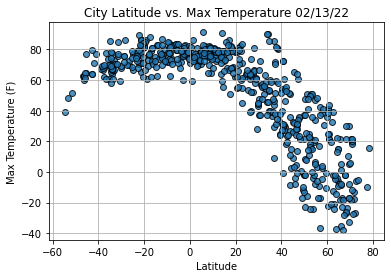

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

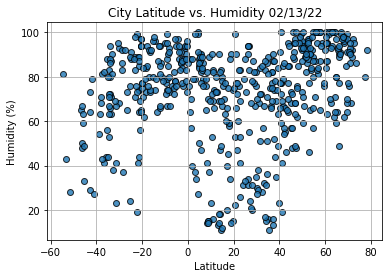

In [20]:
# Plot Latitude vs. Humidity
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

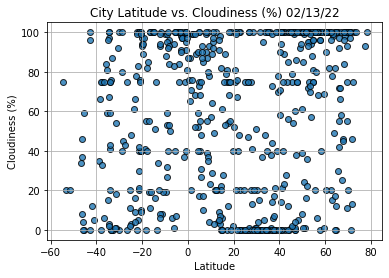

In [21]:
# Plot Latitude vs. Cloudiness
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

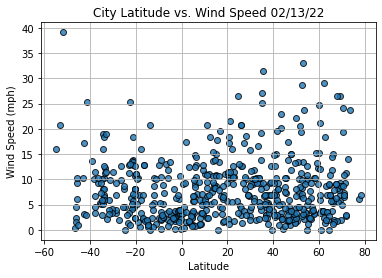

In [22]:
# Plot Latitude vs. Wind Speed
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Use Linear Regression to Find the Relationship Between Variables
# Find the Correlation Between Latitude and Maximum Temperature


In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                       Agadez
Country                        NE
Date          2022-02-13 23:25:07
Lat                         19.75
Lng                         10.25
Max Temp                    62.04
Humidity                       15
Cloudiness                      2
Wind Speed                   5.64
Name: 13, dtype: object

In [26]:
city_data_df['Lat'] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
553     True
554     True
555     True
556     True
557    False
Name: Lat, Length: 558, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Saint George,US,2022-02-13 23:25:01,37.1041,-113.5841,72.07,13,0,3.00
4,Georgetown,MY,2022-02-13 23:24:31,5.4112,100.3354,79.90,90,40,3.44
5,Sitka,US,2022-02-13 23:24:44,57.0531,-135.3300,42.69,81,100,4.61
6,Redcar,GB,2022-02-13 23:25:02,54.6166,-1.0600,46.72,57,100,10.00
13,Agadez,NE,2022-02-13 23:25:07,19.7500,10.2500,62.04,15,2,5.64


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

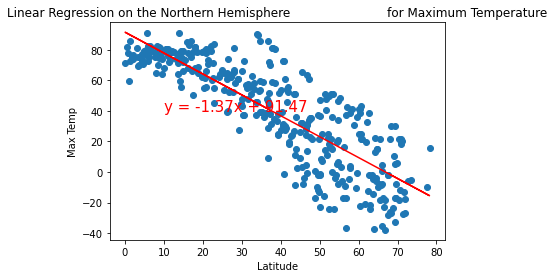

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

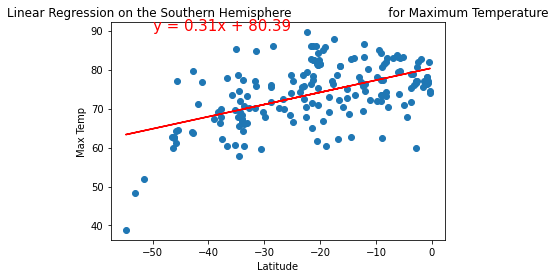

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

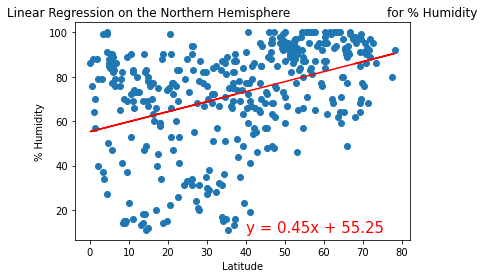

In [31]:
# Find the Correlation Between Latitude and Percent Humidity
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


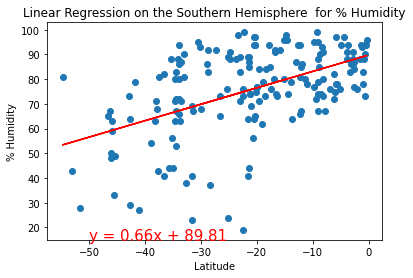

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere  for % Humidity', 
                       '% Humidity',(-50,15))


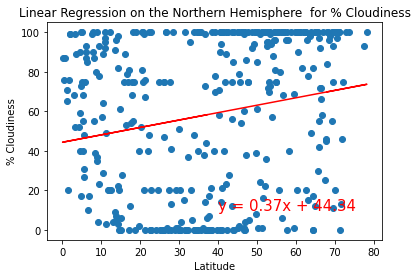

In [33]:
# Find the Correlation Between Latitude and Percent Cloudiness
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere  for % Cloudiness', 
                       '% Cloudiness',(40,10))



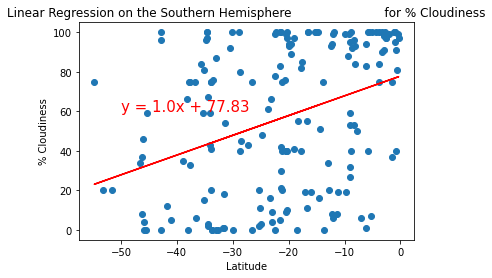

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))


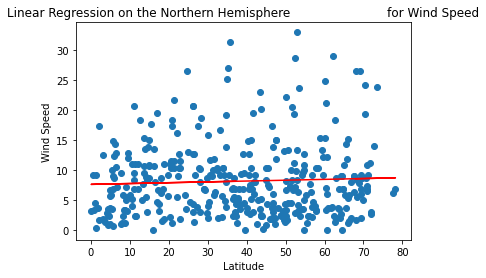

In [35]:
# Find the Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

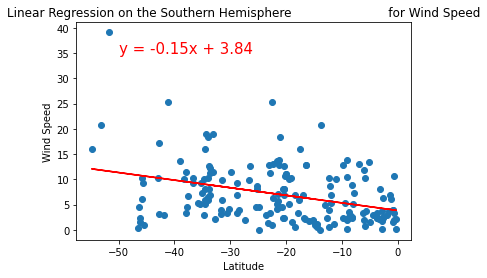

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))